# Can you show snow depth over time? Annually? (Remember, seasons are more important than calendar years. 2020/2021 is more important than just 2021. So maybe choose July 1 as your start of year, or something.)

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

weather = pd.read_pickle('../data-prep/pkl/all_wx.pkl')

In [6]:
pd.set_option('display.max_columns', None)
weather

,dt,temp,dew_pt,rH,heat_idx,wind_chill,wind_dir,wind_spd,hr_precip,snow_depth,snowfall_3hr,snowfall_6hr,snowfall_24hr,site,file_name,year,sea_lvl_press,sta_press,altimeter_setting,solar_radiation,pct_possible
0,2022-12-23 04:00:00,-25.0,-31.0,72.0,NaN,NaN,ESE,1G4,0.0,12.6,0.1,0.1,0.3,JVEMT,JVEMT-2022.html,2022,NaN,NaN,NaN,NaN,NaN
1,2022-12-23 03:00:00,-26.0,-32.0,72.0,NaN,NaN,ESE,1G3,0.0,12.6,0.1,0.1,0.4,JVEMT,JVEMT-2022.html,2022,NaN,NaN,NaN,NaN,NaN
2,2022-12-23 02:00:00,-27.0,-33.0,71.0,NaN,NaN,ESE,1G4,0.0,12.5,0.1,0.0,0.3,JVEMT,JVEMT-2022.html,2022,NaN,NaN,NaN,NaN,NaN
3,2022-12-23 01:00:00,-28.0,-34.0,72.0,NaN,NaN,ESE,2G5,0.0,12.5,0.0,0.0,0.2,JVEMT,JVEMT-2022.html,2022,NaN,NaN,NaN,NaN,NaN
4,2022-12-23 00:00:00,-29.0,-35.0,71.0,NaN,NaN,ESE,2G4,0.0,12.5,0.0,0.0,0.2,JVEMT,JVEMT-2022.html,2022,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203968,2022-01-01 04:00:00,-4.0,NaN,NaN,NaN,-26.0,S,18G31,NaN,40.8,0.1,0.0,NaN,MRPMT,MRPMT-2022.html,2022,NaN,24.60,29.82,NaN,NaN
203969,2022-01-01 03:00:00,-5.0,NaN,NaN,NaN,-26.0,S,15G21,NaN,41.5,0.5,0.3,NaN,MRPMT,MRPMT-2022.html,2022,NaN,24.59,29.81,NaN,NaN
203970,2022-01-01 02:00:00,-3.0,NaN,NaN,NaN,-23.0,SSW,15G25,NaN,40.9,0.0,0.4,NaN,MRPMT,MRPMT-2022.html,2022,NaN,24.59,29.81,NaN,NaN
203971,2022-01-01 01:00:00,-4.0,NaN,NaN,NaN,-22.0,SW,12G19,NaN,40.7,0.0,1.0,NaN,MRPMT,MRPMT-2022.html,2022,NaN,24.57,29.79,NaN,NaN


In [7]:
narrow = weather.loc[:,('dt','snow_depth')]
narrow

,dt,snow_depth
0,2022-12-23 04:00:00,12.6
1,2022-12-23 03:00:00,12.6
2,2022-12-23 02:00:00,12.5
3,2022-12-23 01:00:00,12.5
4,2022-12-23 00:00:00,12.5
...,...,...
203968,2022-01-01 04:00:00,40.8
203969,2022-01-01 03:00:00,41.5
203970,2022-01-01 02:00:00,40.9
203971,2022-01-01 01:00:00,40.7


In [8]:
narrow['month'] = pd.DatetimeIndex(narrow['dt']).month
narrow

,dt,snow_depth,month
0,2022-12-23 04:00:00,12.6,12
1,2022-12-23 03:00:00,12.6,12
2,2022-12-23 02:00:00,12.5,12
3,2022-12-23 01:00:00,12.5,12
4,2022-12-23 00:00:00,12.5,12
...,...,...,...
203968,2022-01-01 04:00:00,40.8,1
203969,2022-01-01 03:00:00,41.5,1
203970,2022-01-01 02:00:00,40.9,1
203971,2022-01-01 01:00:00,40.7,1


In [9]:
narrow['year'] = pd.DatetimeIndex(narrow['dt']).year
narrow

,dt,snow_depth,month,year
0,2022-12-23 04:00:00,12.6,12,2022
1,2022-12-23 03:00:00,12.6,12,2022
2,2022-12-23 02:00:00,12.5,12,2022
3,2022-12-23 01:00:00,12.5,12,2022
4,2022-12-23 00:00:00,12.5,12,2022
...,...,...,...,...
203968,2022-01-01 04:00:00,40.8,1,2022
203969,2022-01-01 03:00:00,41.5,1,2022
203970,2022-01-01 02:00:00,40.9,1,2022
203971,2022-01-01 01:00:00,40.7,1,2022


In [10]:
year2022 = narrow.loc[narrow.year == 2022]
year2022

,dt,snow_depth,month,year
0,2022-12-23 04:00:00,12.6,12,2022
1,2022-12-23 03:00:00,12.6,12,2022
2,2022-12-23 02:00:00,12.5,12,2022
3,2022-12-23 01:00:00,12.5,12,2022
4,2022-12-23 00:00:00,12.5,12,2022
...,...,...,...,...
203968,2022-01-01 04:00:00,40.8,1,2022
203969,2022-01-01 03:00:00,41.5,1,2022
203970,2022-01-01 02:00:00,40.9,1,2022
203971,2022-01-01 01:00:00,40.7,1,2022


<AxesSubplot:xlabel='snow_depth', ylabel='Density'>

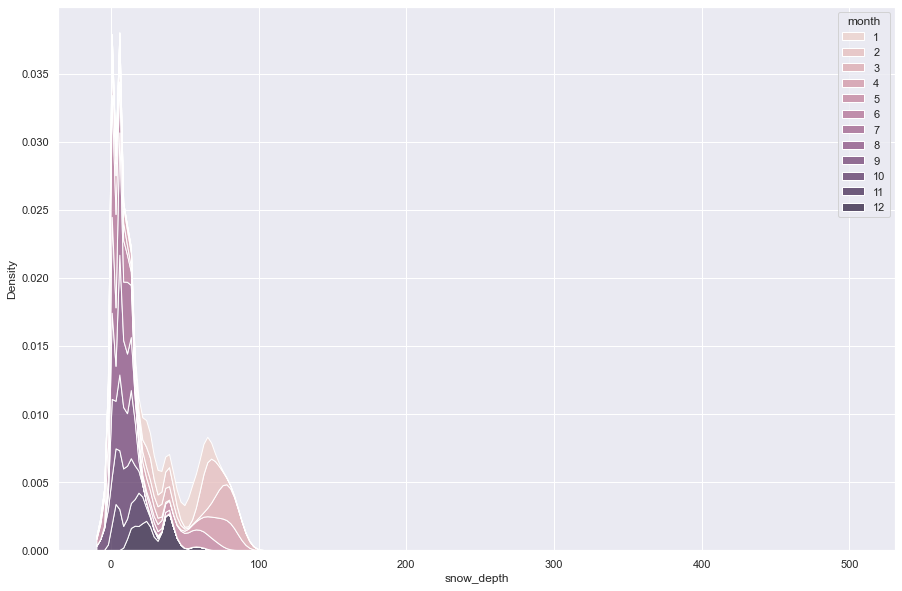

In [11]:
sns.set(rc={'figure.figsize':(15,10)})
sns.kdeplot(data=year2022, x="snow_depth", hue="month", multiple="stack")



In [12]:
narrow

,dt,snow_depth,month,year
0,2022-12-23 04:00:00,12.6,12,2022
1,2022-12-23 03:00:00,12.6,12,2022
2,2022-12-23 02:00:00,12.5,12,2022
3,2022-12-23 01:00:00,12.5,12,2022
4,2022-12-23 00:00:00,12.5,12,2022
...,...,...,...,...
203968,2022-01-01 04:00:00,40.8,1,2022
203969,2022-01-01 03:00:00,41.5,1,2022
203970,2022-01-01 02:00:00,40.9,1,2022
203971,2022-01-01 01:00:00,40.7,1,2022


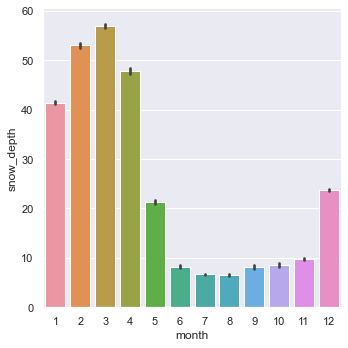

In [31]:
sns.set(rc={'figure.figsize':(15,10)})
snowcat = sns.catplot(x="month",
                y="snow_depth",
                kind="bar",
                data=narrow)

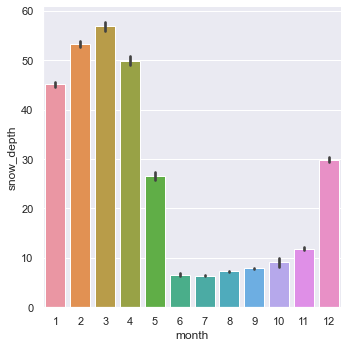

In [32]:
sns.set(rc={'figure.figsize':(15,10)})
snowcat = sns.catplot(x="month",
                y="snow_depth",
                kind="bar",
                data=year2022)

#### Can we see snow depth for each year on one chart?

In [44]:
narrow4 = narrow.loc[(narrow.year == 2019) | (narrow.year == 2020)| (narrow.year == 2021)| (narrow.year == 2022)]
narrow4

,dt,snow_depth,month,year
0,2022-12-23 04:00:00,12.6,12,2022
1,2022-12-23 03:00:00,12.6,12,2022
2,2022-12-23 02:00:00,12.5,12,2022
3,2022-12-23 01:00:00,12.5,12,2022
4,2022-12-23 00:00:00,12.5,12,2022
...,...,...,...,...
203968,2022-01-01 04:00:00,40.8,1,2022
203969,2022-01-01 03:00:00,41.5,1,2022
203970,2022-01-01 02:00:00,40.9,1,2022
203971,2022-01-01 01:00:00,40.7,1,2022


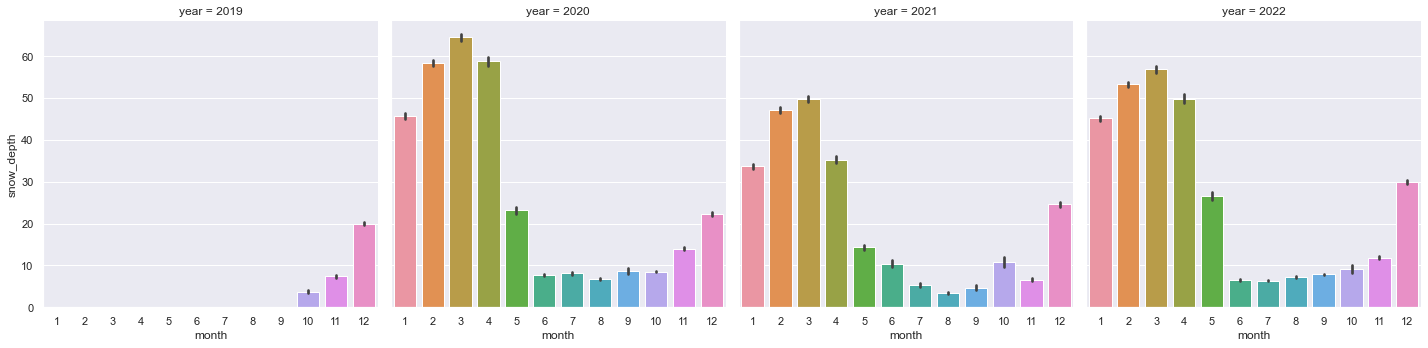

In [45]:
sns.set(rc={'figure.figsize':(30,20)})
snowcats = sns.catplot(
    data=narrow4, x="month", y="snow_depth", col="year",
    kind="bar"
)

In [34]:
year2016 = narrow.loc[narrow.year == 2016]
year2016

,dt,snow_depth,month,year
52215,2016-12-31 16:00:00,NaN,12,2016
52216,2016-12-31 15:00:00,NaN,12,2016
52217,2016-12-31 14:00:00,NaN,12,2016
52218,2016-12-31 13:00:00,NaN,12,2016
52219,2016-12-31 12:00:00,NaN,12,2016
...,...,...,...,...
60974,2016-01-01 11:00:00,NaN,1,2016
60975,2016-01-01 10:00:00,NaN,1,2016
60976,2016-01-01 09:00:00,NaN,1,2016
60977,2016-01-01 08:00:00,NaN,1,2016


In [26]:
weather.year.value_counts()

2020    49692
2022    48814
2021    42086
2019    16560
2016     8764
2017     8558
2018     7139
2008     6214
2007     5591
2014     3536
2011     2040
2010     1875
2015     1718
2012     1386
Name: year, dtype: int64

In [40]:
year2016['snow_depth'].isnull().sum()

8764

In [ ]:
weather.loc[weather.year == 0]

,dt,temp,dew_pt,rH,heat_idx,wind_chill,wind_dir,wind_spd,hr_precip,snow_depth,snowfall_3hr,snowfall_6hr,snowfall_24hr,site,file_name,year,sea_lvl_press,sta_press,altimeter_setting,solar_radiation,pct_possible,month


In [ ]:
weather['month'] = pd.DatetimeIndex(weather['dt']).month

In [ ]:
weather.month.value_counts()

12    21117
11    19433
7     18492
10    18318
3     17170
1     17150
4     17043
5     16772
8     15480
2     15336
6     15198
9     12464
Name: month, dtype: int64

In [48]:
narrow4['month_year'] = pd.to_datetime(weather['dt']).dt.to_period('M')
narrow4

/var/folders/_g/dr204lbj3s1c6m88fsk34kch0000gn/T/ipykernel_16830/3680990365.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  narrow4['month_year'] = pd.to_datetime(weather['dt']).dt.to_period('M')


,dt,snow_depth,month,year,month_year
0,2022-12-23 04:00:00,12.6,12,2022,2022-12
1,2022-12-23 03:00:00,12.6,12,2022,2022-12
2,2022-12-23 02:00:00,12.5,12,2022,2022-12
3,2022-12-23 01:00:00,12.5,12,2022,2022-12
4,2022-12-23 00:00:00,12.5,12,2022,2022-12
...,...,...,...,...,...
203968,2022-01-01 04:00:00,40.8,1,2022,2022-01
203969,2022-01-01 03:00:00,41.5,1,2022,2022-01
203970,2022-01-01 02:00:00,40.9,1,2022,2022-01
203971,2022-01-01 01:00:00,40.7,1,2022,2022-01


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]),
 [Text(0, 0, '2022-12'),
  Text(1, 0, '2022-11'),
  Text(2, 0, '2022-10'),
  Text(3, 0, '2022-09'),
  Text(4, 0, '2022-08'),
  Text(5, 0, '2022-07'),
  Text(6, 0, '2022-06'),
  Text(7, 0, '2022-05'),
  Text(8, 0, '2022-04'),
  Text(9, 0, '2022-03'),
  Text(10, 0, '2022-02'),
  Text(11, 0, '2022-01'),
  Text(12, 0, '2019-12'),
  Text(13, 0, '2019-11'),
  Text(14, 0, '2019-10'),
  Text(15, 0, '2020-12'),
  Text(16, 0, '2020-11'),
  Text(17, 0, '2020-10'),
  Text(18, 0, '2020-09'),
  Text(19, 0, '2020-08'),
  Text(20, 0, '2020-07'),
  Text(21, 0, '2020-06'),
  Text(22, 0, '2020-05'),
  Text(23, 0, '2020-04'),
  Text(24, 0, '2020-03'),
  Text(25, 0, '2020-02'),
  Text(26, 0, '2020-01'),
  Text(27, 0, '2021-12'),
  Text(28, 0, '2021-11'),
  Text(29, 0, '2021-10'),
  Text(30, 0, '2

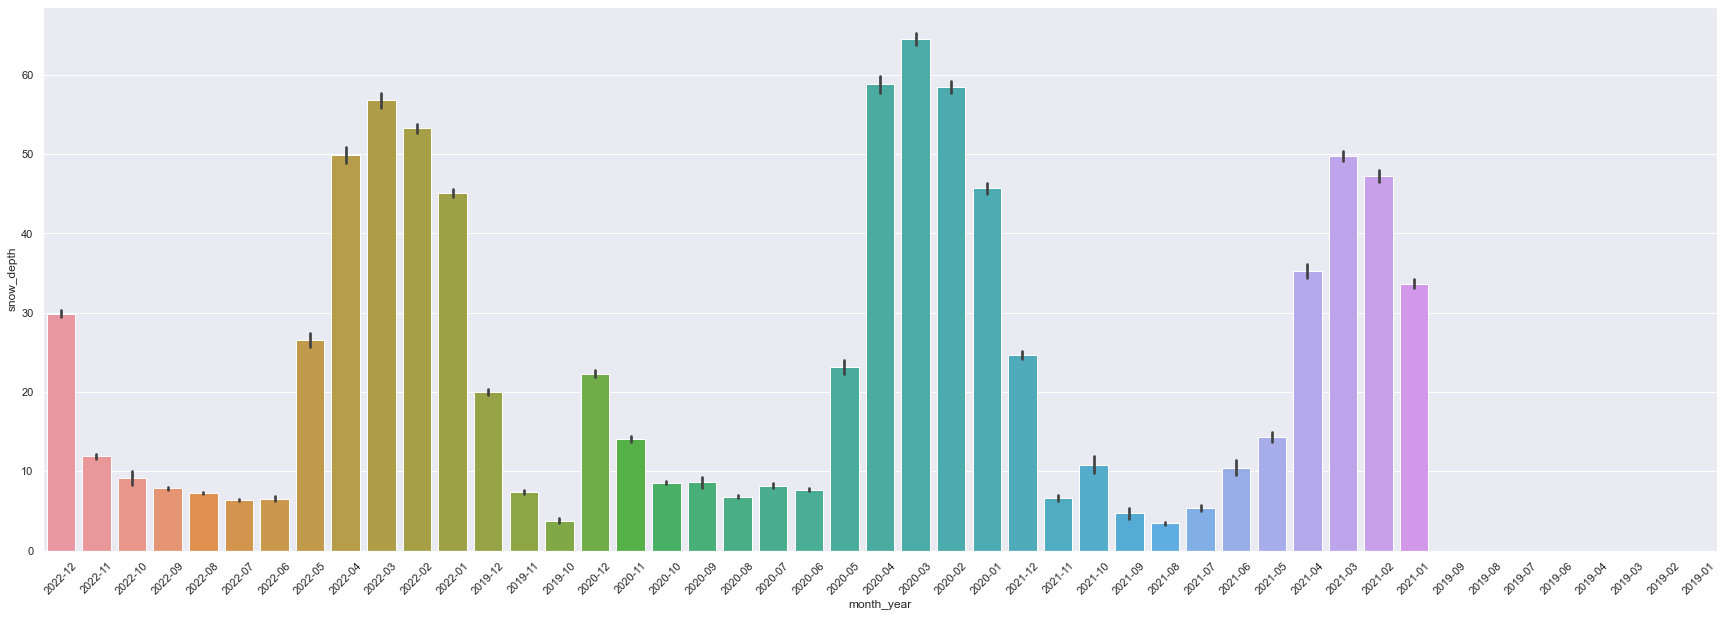

In [63]:
sns.set(rc={'figure.figsize':(30,10)})
snowcat = sns.barplot(x="month_year",
                y="snow_depth",
                data=narrow4)
plt.xticks(rotation=45)